

# <span style='color:Orange'>  Musica y salud mental </span>
#### <span style='color:Violet'>  Ivan Alexis Castillo Reynoso </span>
#### <span style='color:Violet'>  Temas selectos de física computacional.  Tarea 2.  </span>



### <span style='color:Orange'> Objetivo: estudiar si hay alguna relación entre diferentes géneros musicales, y la ansiedad y la depresión </span>

In [94]:
# Se importan las paqueteriaas que se usarán en el trabajo
import pandas as pd
import seaborn as sns
import re

In [95]:
# Se importa el dataset con el que se trabajara
datos=pd.read_csv('dataset.csv')
#Se imprimen los encabezados
col=list(pd.DataFrame(datos))
print(col)

['Timestamp', 'Age', 'Primary streaming service', 'Hours per day', 'While working', 'Instrumentalist', 'Composer', 'Fav genre', 'Exploratory', 'Foreign languages', 'BPM', 'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]', 'Anxiety', 'Depression', 'Insomnia', 'OCD', 'Music effects', 'Permissions']


<span style='color:Violet'>  El conjunto de datos (MxMH) tiene información acerca de la música y autopercepción de diferntes enfermedades mentales. En el conjuto de datos se tienen categorias como la edad, el servicio de streaming principal, total de horas que se escucha musica al día,  si se escucha musica durante el trabajo o cuando se esta estudiando, si toca algún instrumento, género favorito, frecuencia con la que se escuchan diferentes tipos de música, autopercepción de diferentes enfermedades mentales, entre otros. El conjunto de datos se recopilo con un formulario de Google, en el cuál no había restricción de edad o ubicación, el formulario se público en varias redes sociales. Finalmente, las partes más importantes del data set son géneros, en donde se pregunto la frecuencia con que escuchan cada género musical y se dieron las opciones : Never, Rarerly, Sometimes y Very frequently; la segunda parte es la autopercepción de problemas mentales en una escala de 1 a 10</span>

In [96]:
#Se renombran las columnas para evitar que hay espacios y corchetes cuadrados.
datos.columns=[re.sub(r'[ ]','_',x) for x in datos.columns]
datos.columns=[re.sub(r'[[]','_',x) for x in datos.columns]
datos.columns=[re.sub(r'[]]','_',x) for x in datos.columns] ;


<span style='color:Violet'> Se eligiran solo las columnas que se estudiaran, además se observaran las primeras filas del conjunto de datos. </span>

<span style='color:Violet'> Nota: se elgieron solo esas Frequency debido a al punto 1. </span>

In [97]:
# Se seleccionan las columnas del set de datos 
datos=datos[['Fav_genre','Age','Frequency__Classical_','Frequency__Metal_','Frequency__Pop_','Frequency__Rock_','Anxiety', 'Depression','Insomnia']]

In [98]:
# Se seleccionan las columnas del set de datos 
datos.head(3)

,Fav_genre,Age,Frequency__Classical_,Frequency__Metal_,Frequency__Pop_,Frequency__Rock_,Anxiety,Depression,Insomnia
0,Latin,18,Rarely,Never,Very frequently,Never,3,0.0,1.0
1,Rock,63,Sometimes,Never,Sometimes,Very frequently,7,2.0,2.0
2,Video game music,18,Never,Sometimes,Rarely,Rarely,7,7.0,10.0


In [99]:
#Se imprime la información de las columnas.
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fav_genre              736 non-null    object 
 1   Age                    736 non-null    int64  
 2   Frequency__Classical_  736 non-null    object 
 3   Frequency__Metal_      736 non-null    object 
 4   Frequency__Pop_        736 non-null    object 
 5   Frequency__Rock_       736 non-null    object 
 6   Anxiety                736 non-null    int64  
 7   Depression             736 non-null    float64
 8   Insomnia               736 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 51.9+ KB


<span style='color:Violet'> Se observan que hay 736 filas de datos de las 9 columnas que seleccionaron, adémas no hay datos nulos en estas columas, así que no se hara un tratamiento para eliminar dichos datos, porotra parte, se tienen columnas con objetos, enteros y flotantes. Las columnas que tienen objetos son las de género favorito y las frecuencias con que se escuchan los diferentes géneros musicales.</span>

### <span style='color:Orange'>1- Analizar el género favorito de música de la población. </span>

<span style='color:Coral'> Se observaran los géneros favoritos de música de la población, para ello se  gráficaran en un histograma.</span>

<AxesSubplot:>

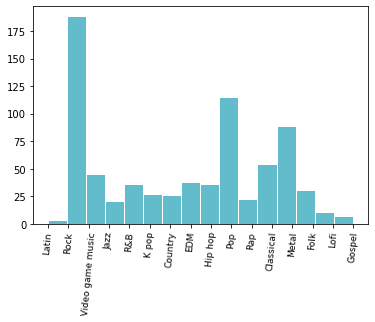

In [100]:
#Se grafico la columna Fav_genre en un histograma.
datos.Fav_genre.hist(bins=16,grid=False, xlabelsize=9,xrot=85,color='#63BCCC', rwidth=0.95)

<span style='color:Violet'> Se tiene que en su mayoria las personas que constestaron la encuesta su género favorito de música es Rock, seguido el Pop, Metal y Música Clasica. Por ello, a partir de este punto nos centraremos en el estudio de estos cuatro géneros musicales, esto tambien se hace considerando el número de personas que les gustan estos generos sean mayores a 50. Además de ello se observa un poco de sesgo por el Rock en el data set que se tendrá que considerar en el análisis</span>

### <span style='color:Orange'>2- Observar el rango de edades de los sujetos de estudio. </span>

<span style='color:Coral'> En este punto se quiere observar el rango de edades en el que se encuentran los sujestos de estudio, para ello se hara un boxplot de las edades y además una descripción de la columna para ver los datos númericos. </span>

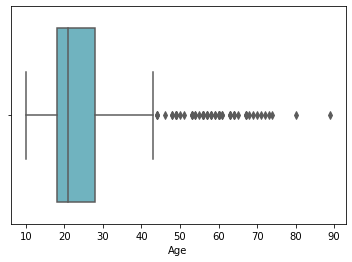

In [101]:
#Se grafico el diagrama de caja para la columna de la edad.
sns.boxplot(data=datos,x='Age',color='#63BCCC');

In [102]:
datos.Age.describe()

count    736.000000
mean      25.206522
std       12.046769
min       10.000000
25%       18.000000
50%       21.000000
75%       28.000000
max       89.000000
Name: Age, dtype: float64

<span style='color:Violet'> Se observa que el 50% las personas que contestaron la encuentas se encuentran entre los 18 y 28 años, además de que el promedio esta en 25.20, es decir, hay un sesgo en los datos de que los encuestados sean adolecentes o adultos jovenes. La edad mínima de los encuestados es 10 y la máxima 89, sin embargo, como se mencionó hay un sesgo a que los ecuestados sean adolecentes o adultos jovenes. Notamos que hay un sesgo hacia la izquierda, se presentan vario valores atipicos arriba de 40 años por lo tanto no hay tantas personas adultas y de la tercera edad.</span>

### <span style='color:Coral'>3- Observar la distribución de las enfermedades mentales  </span>

<span style='color:Coral'> En este punto se observara la autopercepción de tres problemas mentales, ansiedad, depresión e insomnio, para ello se usaran diagrmas de caja.</span>

<AxesSubplot:>

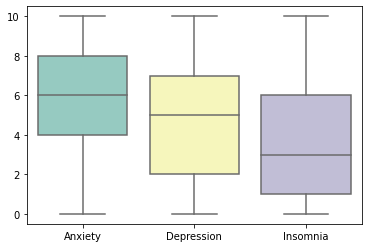

In [103]:
# Se seleccionan los datos de la autopercepción de los diferentes problemas mentales.
Problemas=datos[['Anxiety','Depression','Insomnia']]
# Se graficaron diagrmas de caja para cada uno de los problemas mentales.
sns.boxplot(data=Problemas,palette="Set3")

In [104]:
#Se calcularon los promedios para cada problema mental.
Problemas.mean()

Anxiety       5.836957
Depression    4.796196
Insomnia      3.738451
dtype: float64

<span style='color:Violet'>  Se observa que hay los encuesdados, en general,  se perciben en mayor medida con ansiedad, seguido por la depresión y finalmente con insomnio, el promedio para la ansiedad es de 5.84, para la depresión es de 4.80 y para el insomnio es de 3.74. Observamos que para la depresión hay un asimetria positiva y para el insomnio hay asimetría negativa; como ya se mencionó en su mayoría las personas se perciben con un grado mayor de depresión en comparación con el insomnio, sin embargo, la ansiedad es el problemas más presente.  </span>

### <span style='color:Orange'>4- Observar el género favorito y la salud mental  </span>

<span style='color:Coral'> Se estudiara el género de música favorita y los problemas de salud mental, para ello se considerarám los géneros musicales: Rock, Metal, Pop y Música Clasica, y se divideran en estos cuatro grupos, posteriormente se sacaran los promedios de autopercepción de los diferentes problemas mentales para cada uno de estos grupos, posteriomente se dividiran en el promedio total de los problemas mentales y esto se pondra en un heatmap. </span>

<span style='color:Coral'> Nota: Se dividieron los promedios de cada columna entre el promedio genral para poder visualizar que tanto difiere el promedio de cada uno de los géneros musicales con el promedio general. </span>

<AxesSubplot:ylabel='Fav_genre'>

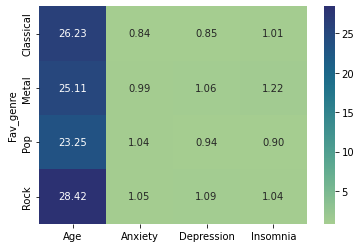

In [105]:
# Se eligen las filas a estudiar.
gen=datos[(datos['Fav_genre']=='Rock')|(datos['Fav_genre']=='Metal')|(datos['Fav_genre']=='Pop')|(datos['Fav_genre']=='Classical')]
#Se eliminan la columna de edad.
gen2=gen.groupby('Fav_genre').mean()
# Se acomodan los índices.
gen2=gen2.reset_index()
# Se definió la columna 'Fav_genre' como índice.
gen2=gen2.set_index('Fav_genre')
# Se dividiron las columnas entre el promedio total.
gen2['Anxiety']/=5.836957
gen2['Insomnia']/=3.738451
gen2['Depression']/=4.796196 
# Se grafico el heatmap.
sns.heatmap(gen2,annot=gen2,fmt='.2f',cmap='crest')


<span style='color:Violet'>  Se observa que en genral los promedios son cercanos al promedio total, sin embrago, se tiene un caso muy particular, el de la autopercepción de insomnio para los encuestados a los que les gusta el metal es mucho mayor que el promedio total, es decir, las personas que prefieren el metal suelen tener mayor insomnio; por otra parte, para la música clasica  se tiene que la relación del promedio con el promedio total para la ansiedad y la depresión es de 0.84 y 0.85 repectivamente, es decir, las personas que prefieren la música clasica se autoperciben en menor medida con deprención y ansiedad. Observamos que las personas que prefieren la música clasica presentan menos problemas mentales en comparación a los demás géneros; y el metal es el que presenta mayores problemas mentales que los demás.</span>


### <span style='color:Orange'> 5. Relación entre la musica clásica y los problemas metales.</span>

<span style='color:Coral'> Se analizara la relación entre la frecuencia con que se escucha música clásica con los problemas, para esto, primero se observó que no hubiera menos de cien datos cada una de las clasificación de la frecuencia con la que se escucha música clasica. Posterioemente se presentan en una tabla los promedios de la percepción de problemas mentales con respecto a cada una de las variables de la frecuencia con la que se escucha música clasica. </span>

In [106]:
datos.Frequency__Classical_.value_counts()

Rarely             259
Sometimes          200
Never              169
Very frequently    108
Name: Frequency__Classical_, dtype: int64

In [107]:
Clas=datos.drop(columns=['Age'])
Clas2=Clas.groupby(['Frequency__Classical_']).mean()
Clas2=Clas2.reset_index()
Clas2['Anxiety']/=5.836957
Clas2['Insomnia']/=3.738451
Clas2['Depression']/=4.796196 
Clas2


,Frequency__Classical_,Anxiety,Depression,Insomnia
0,Never,1.022864,1.009799,0.946505
1,Rarely,0.998828,0.985739,0.949643
2,Sometimes,1.027076,1.031025,1.036526
3,Very frequently,0.916891,0.961410,1.136834


<span style='color:Violet'>Se observa que en general, mientras más se escucha música clasica se presentan menos problemas de ansiedad y depresión, lo que se esperaba considerando el punto anterior, sin embargo, para el insomnio se observa que mientras más se escuche música clasica los problemas de insomnio son mayores, esto podría hacer pensar que gente con insomnio escucha música clasica para dormir, sin embargo esto no es concluyente, solo es una suposición. Podemos decir que si hay una relación entre la música clasica y los problemas mentales de ansiedad y depresión, siendo esta que mientras más se escucha música clasica, es menos probable que te autopercibas con depresión o ansiedad. </span>

### <span style='color:Orange'> 6. Relación entre la frecuencia con que se essucha metal y las enfermedades metales.</span>

<span style='color:Coral'>  Analógamente al punto anterior, se analizara la relación entre la frecuencia con que se escucha metal con los problemas, para esto, primero se observó que no hubiera menos de cien datos cada una de las clasificación de la frecuencia con la que se escucha música clasica. Posterioemente se graficaron los promedios de la percepción de problemas mentales con respecto a cada una de las variables de las frecuencias, es decir, se hizo un análisis con énfoque similar pero se presenta de manera distinto. </span>

In [108]:
datos.Frequency__Metal_.value_counts()

Never              264
Rarely             192
Very frequently    146
Sometimes          134
Name: Frequency__Metal_, dtype: int64

<AxesSubplot:ylabel='Frequency__Metal_'>

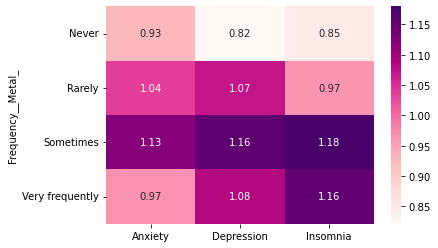

In [109]:
Metal=datos.drop(columns=['Age'])
Metal2=Metal.groupby(['Frequency__Metal_']).mean()
Metal2=Metal2.reset_index()
Metal2=Metal2.set_index('Frequency__Metal_')
Metal2['Anxiety']/=5.836957
Metal2['Insomnia']/=3.738451
Metal2['Depression']/=4.796196 
sns.heatmap(Metal2,annot=Metal2,fmt='.2f',cmap='RdPu')

<span style='color:Violet'> Se observa que las personas que escuchan metal com más frecuencia presentan más insomnio, en el caso de la ansiedad no se puede concluir si hay alguna relación o no, finalmete para se presenta menor depresión en las personas que no escuchan mental frecuentemente. </span>